In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('NASA_Exoplanet.csv')

In [4]:
le_disposition = LabelEncoder() # 3 classes
le_pdisposition = LabelEncoder() # 2 classes
df['koi_disposition_encode'] = le_disposition.fit_transform(df['koi_disposition'])
df['koi_pdisposition_encode'] = le_pdisposition.fit_transform(df['koi_pdisposition'])

In [5]:
# print(df['koi_disposition_encode'])
# print(df['koi_disposition'])

# Select Features
# features = ['koi_score', 'koi_period', 'koi_prad', 'koi_teq', 'koi_insol']
# features = [
#     'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
#     'koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_model_snr',
#     'koi_steff', 'koi_srad', 'koi_slogg', 'koi_prad', 'koi_kepmag'
# ]

features = ['koi_depth', 'koi_score', 'koi_teq', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']

X = df[features]
# Y = df['koi_disposition_encode']
Y = df['koi_pdisposition_encode']

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [6]:
# Train model
model = RandomForestClassifier(random_state=100)
model.fit(X_train, Y_train)

# Eval model
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=le_pdisposition.classes_))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

                precision    recall  f1-score   support

     CANDIDATE       0.99      1.00      0.99      1401
FALSE POSITIVE       1.00      0.99      0.99      1469

      accuracy                           0.99      2870
     macro avg       0.99      0.99      0.99      2870
  weighted avg       0.99      0.99      0.99      2870

Accuracy: 0.9944250871080139


In [16]:
# Orbital Period = 
# Transit Signal-to-Noise = koi_model_snr

# Not in dataset = koi_ror, koi_sma, koi_incl, koi_ingress, koi_num_transits

disposition_features = ['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
transit_features = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_model_snr', 'koi_teq']
features = disposition_features + transit_features

X = df[features]
# Y = df['koi_disposition_encode']
Y = df['koi_pdisposition_encode']

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [17]:
# Train model
model = RandomForestClassifier(random_state=100)
model.fit(X_train, Y_train)

# Eval model
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=le_pdisposition.classes_))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                precision    recall  f1-score   support

     CANDIDATE       0.99      1.00      0.99      1401
FALSE POSITIVE       1.00      0.99      0.99      1469

      accuracy                           0.99      2870
     macro avg       0.99      0.99      0.99      2870
  weighted avg       0.99      0.99      0.99      2870

Accuracy: 0.9905923344947736
          Feature  Gini Importance
0       koi_score         0.390391
1   koi_fpflag_nt         0.166167
2   koi_fpflag_ss         0.143543
3   koi_fpflag_co         0.116158
8       koi_depth         0.040077
10        koi_teq         0.031786
4   koi_fpflag_ec         0.031028
5      koi_period         0.025949
9   koi_model_snr         0.020489
7    koi_duration         0.017725
6      koi_impact         0.016688


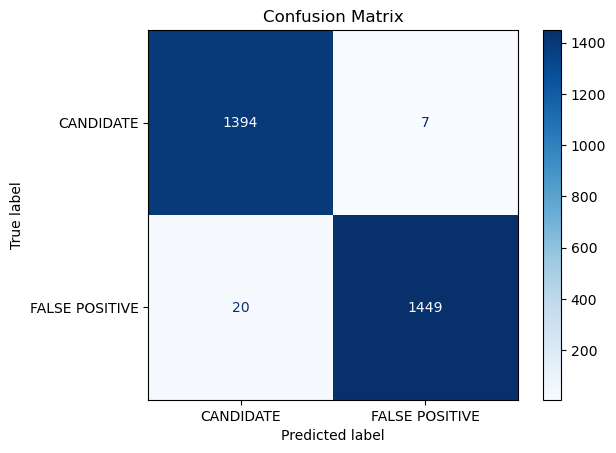

In [9]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CANDIDATE', 'FALSE POSITIVE'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [18]:
disposition_features = ['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
transit_features = ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_model_snr']
features = disposition_features + transit_features

X = df[features]
# Y = df['koi_disposition_encode']
Y = df['koi_disposition_encode']

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.80      0.82       585
     CONFIRMED       0.87      0.91      0.89       817
FALSE POSITIVE       0.99      0.99      0.99      1468

      accuracy                           0.93      2870
     macro avg       0.90      0.90      0.90      2870
  weighted avg       0.93      0.93      0.93      2870

Accuracy: 0.9275261324041811


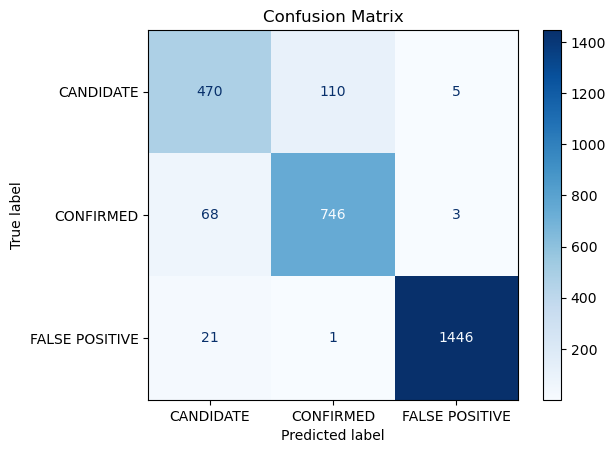

In [19]:
# Train model
model = RandomForestClassifier(random_state=100)
model.fit(X_train, Y_train)

# Eval model
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=le_disposition.classes_))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [20]:
df_clean = pd.read_csv('NASA_Exoplant_df_merged_meadian.csv')
le_disposition = LabelEncoder() # 3 classes
le_pdisposition = LabelEncoder() # 2 classes
df_clean['koi_disposition_encode'] = le_disposition.fit_transform(df['koi_disposition'])
df_clean['koi_pdisposition_encode'] = le_pdisposition.fit_transform(df['koi_pdisposition'])

Y = df_clean['koi_pdisposition_encode']
df_total_rnd_forest = df_clean.drop(columns=['koi_pdisposition_encode', 'kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition', 'koi_disposition_encode'])

X = df_clean

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

print(classification_report(Y_test, Y_pred, target_names=le_pdisposition.classes_))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter